# Symbolic Computation: The Pitfalls

This collection of notebooks is mostly numerical, with not a lot of exact or symbolic computation, with the exception of polynomial computation done by computing with vectors of monomial basis coefficients, so it's really numerical anyway.  Why not do symbolic computation?  And, for that matter, why is numerical computing (even with all the unexpected behaviour of floating-point arithmetic) so much more popular than symbolic or exact computing?

This section explores symbolic computation and its pitfalls.  We do so from the point of view of experience and with some authority: we have used symbolic computation (usually in Maple, but also in other symbolic languages) for years (decades!) and know it and its benefits well. <b>Caveat: We do not know SymPy so well, and so if we say that SymPy <i>can't</i> do something, we may well be wrong.</b> One of us knows Sage quite well, but we're not using Sage here (yet).

One of RMC's earliest co-authors, Honglin Ye, put it well when he suggested that not everyone needs numerical methods but that <i>everyone</i> could use symbolic computation.

Wait.  Isn't that contradictory?  If everyone could use it, why aren't they?

There are, we think, a few main obstacles.

1. Symbolic computation systems are hard to learn how to use well, because there's a lot to learn (indeed, you kind of have to know the math first, too).  Look at the <A HREF="https://docs.sympy.org/latest/tutorial/index.html">SymPy Tutorial</A> for example. It has ten sections, one labeled "Gotchas". The SAGEMATH system, which also works with Python, is both more powerful and more complicated: <A HREF="https://doc.sagemath.org/html/en/tutorial/">See the SAGEMATH Tutorial </A> to get started there.
2. Some mathematical problems are inherently too expensive to solve in human lifetimes, even with today's computers, and people unfairly blame symbolic computation systems for this.
3. Even if you can solve a problem exactly, with extra effort, that effort might be wasted because the approximate answers are <i>also</i> the "exact" answers to similar problems, and those similar problems might be just as good a model of whatever system you were trying to understand.  This is especially true if the data is only known approximately.
4. "Symbolic Computation" and "Computer Algebra" are related terms&mdash;about as close as "Numerical Analysis" and "Computational Science" if that comparison means anything&mdash;but the differences are remarkably important, because what gets <i>implemented</i> is usually a Computer Algebra system, whereas what people actually <i>want to use</i> is a symbolic computation system.  We'll show you what that means.
5. Symbolic computation systems are hard to implement well.  The major systems (Maple, Mathematica, and Matlab) charge money for their products, and get what they ask for; this is because their systems are better than the free ones in many respects, because they have invested significant programmer time to address the inherent difficulties.  Free systems, such as SymPy, will do the easy things for you; and we will see that they can be useful.  But in reality there's no comparison (although we admit that the SAGEMATH people may well disagree with our opinion).

All that said, symbolic computation <i>can</i> be extremely useful (and interesting), and is sometimes worth all the bother. Let's look first at what Python and SymPy can do.  Later we'll look at what the difficulties are.

In [1]:
n = 100
p = 1
for i in range(n): 
    p = p*(i+1)
print( n, ' factorial is ', p)
print( 'The floating point value of p is ', 1.0*p )

100  factorial is  93326215443944152681699238856266700490715968264381621468592963895217599993229915608941463976156518286253697920827223758251185210916864000000000000000000000000
The floating point value of p is  9.332621544394415e+157


The first thing we see is that Python has, built-in, arbitrary precision integer arithmetic.  Yay?

In [2]:
n = 720
p = 1
for i in range(n): 
    p = p*(i+1)
print( n, ' factorial is ', p)
# print( 'The floating point value of p is ', 1.0*p )  # Causes OverflowError

720  factorial is  260121894356579510020490322708104361119152187501694578572754183785083563115694738224067857795813045708261992057589224725953664156516205201587379198458774083252910524469038881188412376434119195104550534665861624327194019711390984553672727853709934562985558671936977407000370043078375899742067678401696720784628062922903210716166986726054898844551425719398549944893959449606404513236214026598619307324936977047760606768067017649166940303481996188145562519559256691883082551494294759653727484562462882423452659778973774089646655399243592878621251596748322097602950569669992728467056374713753301924831358707612541268341586012944756601145542074958995256354306828863463108496565068277155299625679084523570255218622235813001670083452344323682193579318470195651072978180435417389056072742804858399591972902172661229129842051606757903623233769945396419147517556755769539223380305682530859997744167578435281591346134039460490126954202883834710136373382448450666009334848444071193129253769465

Large integers cost more to manipulate, and the above number is pretty long.  But SymPy will do it if you ask.  One thing you might want to do is <i>factor</i> those numbers.  Or one might just want to know the prime factors.

In [3]:
from sympy import primefactors 

primefactors_n = primefactors(n)  
print("The prime factors of {} : {}".format(n, primefactors_n)) 

primefactors_p = primefactors(p)  
print("The prime factors of {} : {}".format(p, primefactors_p)) 


The prime factors of 720 : [2, 3, 5]
The prime factors of 260121894356579510020490322708104361119152187501694578572754183785083563115694738224067857795813045708261992057589224725953664156516205201587379198458774083252910524469038881188412376434119195104550534665861624327194019711390984553672727853709934562985558671936977407000370043078375899742067678401696720784628062922903210716166986726054898844551425719398549944893959449606404513236214026598619307324936977047760606768067017649166940303481996188145562519559256691883082551494294759653727484562462882423452659778973774089646655399243592878621251596748322097602950569669992728467056374713753301924831358707612541268341586012944756601145542074958995256354306828863463108496565068277155299625679084523570255218622235813001670083452344323682193579318470195651072978180435417389056072742804858399591972902172661229129842051606757903623233769945396419147517556755769539223380305682530859997744167578435281591346134039460490126954202883834710136373382

Factoring seems like such a simple problem, and it's so natural to have it implemented in a symbolic computation system.  The number 720! is 1747 digits long.  Maybe all 1700--odd digits long integers are so easy to factor?

Um, no.  See the discussion [here](https://en.wikipedia.org/wiki/Integer_factorization) to get started.  Let's take a modest problem and time it here.

In [4]:
funny = 3000000000238000000004719
#notfunny = 45000000000000000057990000000000000024761900000000000003506217
from sympy import factorint
import time
start_time = time.time()
factordict = factorint(funny)  
print("The prime factors of {} : {}".format(funny, factordict)) 
print("--- %s seconds ---" % (time.time() - start_time))


The prime factors of 3000000000238000000004719 : {1000000000039: 1, 3000000000121: 1}
--- 0.9057760238647461 seconds ---


That factoring of $3000000000238000000004719$ __with the previous version of SymPy__ took between 8 and 11 seconds on this machine (different times if executed more than once) but has since been improved to be just under a second; on this very same machine, Maple's "ifactor" command succeeds so quickly that it registers no time taken at all, possibly because it is using a very specialized method; factoring integers is an important feature of symbolic computation and Maple's procedures for it have been a subject of serious research for a long time.  Maple's help pages cite three important papers, and tell you that it uses an algorithm called the quadratic sieve.  Maple can factor $45000000000000000057990000000000000024761900000000000003506217$ into its three prime factors in about 7.5 seconds on this machine; in contrast, after fifty minutes running trying to factor that with factorint as above, RMC had to hard-restart to get Python's attention. (Haven't tried with the new version, though.)

That SymPy takes so long to factor integers, in comparsion, suggests that it still isn't using the best methods (the documentation says that it switches between three methods, trial division, Pollard rho, and Pollard p-1) ; and because factoring is such a basic algorithm (an even more basic one is GCD or Greatest Common Divisor) this will have important knock-on effects.

But factoring, as old an idea as it is, is complicated enough to be used as a basic idea in modern cryptography.  The slowness of SymPy is not completely its fault: the problem is hard.

Let's move on to computing with functions.  As previously stated, most supposedly "symbolic" systems are really "algebra" systems: this means that they work well with polynomials (even multivariate polynomials).  A polynomial considered as an algebraic object is isomorphic to a polynomial considered as a function, but the difference in viewpoint can alter the affordances.  What the word "affordance" means in this context is that "something can happen with it": for instance, you can pick out a lowest-degree term; or you can add it to another polynomial; or you can square it; and so on.  As a function, you can evaluate it at a particular value for the symbols (variables).

In [5]:
from sympy import *
x = symbols('x')

solveset(Eq(x**2, 3), x)


{-sqrt(3), sqrt(3)}

In [6]:
solveset(Eq(x**3+x-1, 0), x)

{-1/(3*(1/2 + sqrt(93)/18)**(1/3)) + (1/2 + sqrt(93)/18)**(1/3), -(1/2 + sqrt(93)/18)**(1/3)/2 + 1/(6*(1/2 + sqrt(93)/18)**(1/3)) + I*(sqrt(3)/(6*(1/2 + sqrt(93)/18)**(1/3)) + sqrt(3)*(1/2 + sqrt(93)/18)**(1/3)/2), -(1/2 + sqrt(93)/18)**(1/3)/2 + 1/(6*(1/2 + sqrt(93)/18)**(1/3)) + I*(-sqrt(3)*(1/2 + sqrt(93)/18)**(1/3)/2 - sqrt(3)/(6*(1/2 + sqrt(93)/18)**(1/3)))}

In [7]:
start_time = time.time()
#solveset(Eq(x**4+x-1, 0), x) # Interrupted after about two hours: the code did not succeed
print("--- %s seconds ---" % (time.time() - start_time))

--- 0.0 seconds ---


__Updated__ With the new version of SymPy, that computation succeeds in under 3 seconds.  Got the right answers, too.

Nevertheless. In those original two hours, RMC went and had his dinner; then downloaded <A HREF="https://www.tandfonline.com/doi/pdf/10.1080/00029890.2007.11920389">a paper by Dave Auckly from the American Mathematical Monthly 2007 </A> which talks about solving the quartic with a pencil (an algebraic geometer's pencil!), read it, and solved the problem by hand, including solving the resolvent cubic by hand, which he already knew how to do.  And got it right, too. So there.

In contrast, Maple (nearly instantaneously) returns&mdash;if you force it to by saying you want the explicit solution&mdash;the answer

$$
\frac{\sqrt{6}\, \sqrt{\frac{\left(108+12 \sqrt{849}\right)^{\frac{2}{3}}-48}{\left(108+12 \sqrt{849}\right)^{\frac{1}{3}}}}}{12}+\frac{\mathrm{I} \sqrt{6}\, \sqrt{\frac{\left(108+12 \sqrt{849}\right)^{\frac{2}{3}} \sqrt{\frac{\left(108+12 \sqrt{849}\right)^{\frac{2}{3}}-48}{\left(108+12 \sqrt{849}\right)^{\frac{1}{3}}}}+12 \sqrt{6}\, \left(108+12 \sqrt{849}\right)^{\frac{1}{3}}-48 \sqrt{\frac{\left(108+12 \sqrt{849}\right)^{\frac{2}{3}}-48}{\left(108+12 \sqrt{849}\right)^{\frac{1}{3}}}}}{\left(108+12 \sqrt{849}\right)^{\frac{1}{3}} \sqrt{\frac{\left(108+12 \sqrt{849}\right)^{\frac{2}{3}}-48}{\left(108+12 \sqrt{849}\right)^{\frac{1}{3}}}}}}}{12}
, 
\frac{\sqrt{6}\, \sqrt{\frac{\left(108+12 \sqrt{849}\right)^{\frac{2}{3}}-48}{\left(108+12 \sqrt{849}\right)^{\frac{1}{3}}}}}{12}-\frac{\mathrm{I} \sqrt{6}\, \sqrt{\frac{\left(108+12 \sqrt{849}\right)^{\frac{2}{3}} \sqrt{\frac{\left(108+12 \sqrt{849}\right)^{\frac{2}{3}}-48}{\left(108+12 \sqrt{849}\right)^{\frac{1}{3}}}}+12 \sqrt{6}\, \left(108+12 \sqrt{849}\right)^{\frac{1}{3}}-48 \sqrt{\frac{\left(108+12 \sqrt{849}\right)^{\frac{2}{3}}-48}{\left(108+12 \sqrt{849}\right)^{\frac{1}{3}}}}}{\left(108+12 \sqrt{849}\right)^{\frac{1}{3}} \sqrt{\frac{\left(108+12 \sqrt{849}\right)^{\frac{2}{3}}-48}{\left(108+12 \sqrt{849}\right)^{\frac{1}{3}}}}}}}{12}
, 
-\frac{\sqrt{6}\, \sqrt{\frac{\left(108+12 \sqrt{849}\right)^{\frac{2}{3}}-48}{\left(108+12 \sqrt{849}\right)^{\frac{1}{3}}}}}{12}+\frac{\sqrt{6}\, \sqrt{\frac{-\left(108+12 \sqrt{849}\right)^{\frac{2}{3}} \sqrt{\frac{\left(108+12 \sqrt{849}\right)^{\frac{2}{3}}-48}{\left(108+12 \sqrt{849}\right)^{\frac{1}{3}}}}+12 \sqrt{6}\, \left(108+12 \sqrt{849}\right)^{\frac{1}{3}}+48 \sqrt{\frac{\left(108+12 \sqrt{849}\right)^{\frac{2}{3}}-48}{\left(108+12 \sqrt{849}\right)^{\frac{1}{3}}}}}{\left(108+12 \sqrt{849}\right)^{\frac{1}{3}} \sqrt{\frac{\left(108+12 \sqrt{849}\right)^{\frac{2}{3}}-48}{\left(108+12 \sqrt{849}\right)^{\frac{1}{3}}}}}}}{12}
, 
-\frac{\sqrt{6}\, \sqrt{\frac{\left(108+12 \sqrt{849}\right)^{\frac{2}{3}}-48}{\left(108+12 \sqrt{849}\right)^{\frac{1}{3}}}}}{12}-\frac{\sqrt{6}\, \sqrt{\frac{-\left(108+12 \sqrt{849}\right)^{\frac{2}{3}} \sqrt{\frac{\left(108+12 \sqrt{849}\right)^{\frac{2}{3}}-48}{\left(108+12 \sqrt{849}\right)^{\frac{1}{3}}}}+12 \sqrt{6}\, \left(108+12 \sqrt{849}\right)^{\frac{1}{3}}+48 \sqrt{\frac{\left(108+12 \sqrt{849}\right)^{\frac{2}{3}}-48}{\left(108+12 \sqrt{849}\right)^{\frac{1}{3}}}}}{\left(108+12 \sqrt{849}\right)^{\frac{1}{3}} \sqrt{\frac{\left(108+12 \sqrt{849}\right)^{\frac{2}{3}}-48}{\left(108+12 \sqrt{849}\right)^{\frac{1}{3}}}}}}}{12}
$$

This is an example of what Velvel Kahan calls a "wallpaper expression."  He also famously said, "Have you ever asked a computer algebra system a question, and then, as the screensful of answer whizzed past your eyes, said "I wish I hadn't asked?""

The use of that exact answer (quickly obtained or not) is questionable.  Then, of course, the Abel-Ruffini theorem says that there is <i>no</i> general formula for solving polynomials of degree $5$ or higher <i>in terms of radicals</i>.  For degree $5$ polynomials, there <i>is</i> a solution in terms of elliptic functions; again, it's complicated enough that it's of questionable use.  Then there is Galois theory which describes the algebraic structures of polynomials.  See the interesting historical essay by Nick Trefethen on <A HREF="https://people.maths.ox.ac.uk/trefethen/galois.pdf"> What we learned from Galois </A>.

The lesson here is that even when you <i>can</i> solve something exactly, maybe you shouldn't.  

There are some interesting things you can do with univariate polynomials of high degree, including with the algebraic numbers that are their roots.  But computation with them isn't so easy.  SymPy actually has some quite advanced features for polynomials, including multivariate polynomials.

Let's reinforce that lesson ("Even if you can, maybe you shouldn't") with a little linear algebra.  Some of the material of this OER uses determinants of matrices, and introductory textbooks give the formula

$$
\det \left[\begin{array}{cc}
a_{1,1} & a_{1,2} 
\\
 a_{2,1} & a_{2,2} 
\end{array}\right]
 = a_{1,1} a_{2,2}-a_{1,2} a_{2,1}
$$

usually with the simpler notation where the matrix is has entries $a$, $b$, $c$, $d$ and the determinant is $ad-bc$.

The formula for the three-by-three case is more obnoxious:

$$
\det \left[\begin{array}{ccc}
a_{1,1} & a_{1,2} & a_{1,3} 
\\
 a_{2,1} & a_{2,2} & a_{2,3} 
\\
 a_{3,1} & a_{3,2} & a_{3,3} 
\end{array}\right] = a_{1,1} a_{2,2} a_{3,3}-a_{1,1} a_{2,3} a_{3,2}-a_{1,2} a_{2,1} a_{3,3}+a_{1,2} a_{2,3} a_{3,1}+a_{1,3} a_{2,1} a_{3,2}-a_{1,3} a_{2,2} a_{3,1}
$$

This six-term formula, which can be rearranged to make it less costly to evaluate, cannot be made (much) simpler for humans to understand.

The four-by-four case has twenty-four terms in its determinant, and requires effort to read.  Again it can be rearranged to make it less costly to evaluate, but cannot be made much simpler for humans to understand.

The _general_ formula looks pretty simple, however:

$$
\det \mathbf{A} = \sum_{\sigma \in S_n} \mathrm{sgn}(\sigma) \prod_{i=1}^n a_{i,\sigma_i}
$$

The difficulty comes in unpacking the notation.  The outer sum is over all $n!$ permutations of the integers $1$, $2$, $\ldots$, $n$ (so when $n=4$ there are $4! = 24$ terms, when $n=5$ there are $5!=120$ terms, etc).  One has to be able to determine the _sign_ of a permutation as well.  The factorial number of terms is pretty inescapable.

Computer algebra systems will quite happily give you these determinantal formulas, written out.  But even for a ten-by-ten matrix (which is pretty small in today's terms) there will be $10! = 3,628,800$ terms in the answer, which will occupy several screens.  Evaluation of that formula, given numerical values for the $a_{i,j}$, has to consider each of those (more than three million) terms.

Now, sometimes things can be done with those symbolic expressions.  We mentioned above that they can be rearranged to be less costly to evaluate.  Here is a "straight-line program" to evaluate the five-by-five determinant, found by Maple's `codegen[optimize]` command.

```
   t2 := a[5, 4]; 
   t22 := a[1, 4]; 
   t23 := a[1, 3]; 
   t24 := a[1, 2]; 
   t8 := a[4, 3]; 
   t9 := a[4, 2]; 
   t28 := t23*t9-t24*t8; 
   t3 := a[5, 3]; 
   t4 := a[5, 2]; 
   t29 := t23*t4-t24*t3; 
   t38 := t3*t9-t4*t8; 
   t7 := a[4, 4]; 
   t47 := t2*t28-t22*t38-t29*t7; 
   t12 := a[3, 4]; 
   t13 := a[3, 3]; 
   t14 := a[3, 2]; 
   t30 := t22*t9-t24*t7; 
   t31 := t22*t8-t23*t7; 
   t46 := t12*t28-t13*t30+t14*t31; 
   t17 := a[2, 4]; 
   t18 := a[2, 3]; 
   t19 := a[2, 2]; 
   t45 := (t18*t9-t19*t8)*t12-(t17*t9-t19*t7)*t13+(t17*t8-t18*t7)*t14; 
   t39 := t2*t9-t4*t7; 
   t40 := t2*t8-t3*t7;
   t44 := t12*t38-t13*t39+t14*t40; 
   t43 := t17*t28-t18*t30+t19*t31; 
   t33 := t2*t24-t22*t4; 
   t34 := t2*t23-t22*t3; 
   t42 := t17*t29+t18*t33-t19*t34; 
   t41 := t17*t38-t18*t39+t19*t40; 
   t25 := a[1, 1]; 
   t5 := a[5, 1]; 
   t32 := t2*t25-t22*t5; 
   t27 := t23*t5-t25*t3; 
   t26 := t24*t5-t25*t4; 
   t20 := a[2, 1]; 
   t15 := a[3, 1]; 
   t10 := a[4, 1]; 
   t1 := (-t42*t15+(t17*t27+t18*t32-t20*t34)*t14+(-t17*t26-t19*t32+t20*t33)*t13
         +(t18*t26-t19*t27+t20*t29)*t12)*a[4, 5]+(-t45*t5+t44*t20-t41*t15+((t17*t3-t2*t18)*t14
         +(-t17*t4+t19*t2)*t13+(t18*t4-t19*t3)*t12)*t10)*a[1,5]
         +(t46*t5-t44*t25-t47*t15+(-t12*t29-t13*t33+t14*t34)*t10)*a[2, 5]
         +(t10*t42+t20*t47+t25*t41-t43*t5)*a[3, 5]
         +(t45*t25-t46*t20+t43*t15+((-t17*t23+t22*t18)*t14+(t17*t24-t19*t22)*t13
          +(-t18*t24+t19*t23)*t12)*t10)*a[5, 5]
```
(that was cut-and-pasted in and hand-edited for clarity: hopefully no typos were introduced).  The cost of evaluating the original big ugly expression with $120$ terms is 119 additions + 480 multiplications + 600 subscripts.
The cost of evaluating that _straight line program_ above (generated by computer algebra) is only 25 subscripts + 40 assignments + 106 multiplications + 66 additions, in comparison; this is a significant reduction in cost.  Also, there were no _divisions_ introduced, which normal floating-point operations do.  So, this compression is possibly of interest.

But sometimes no compression is possible, and the only thing one can say about a huge symbolic answer is "It is what it is."

The _general_ case of optimal algorithms for linear algebra even over the integers, never mind with symbols, is a topic of much current study.  We do not even know the cheapest way to multiply two matrices!  And that algorithm gives a key to almost every other algorithm.  These problems are _hard_.

## Symbolic computation with functions

Let's try some calculus-like things.

In [8]:
y = symbols('y')

solveset(Eq(exp(y), x), y)

ImageSet(Lambda(_n, I*(2*_n*pi + arg(x)) + log(Abs(x))), Integers)

RMC <b>really</b> doesn't like that "solution"!  It has separated the real and imaginary parts without needing to.  A perfectly good answer would be $\ln_n(x)$, which looks a lot simpler.

$\ln_k(z)$, which might not look familiar to you, means $\ln(z) + 2\pi i k$.  

Fine.  We will live with it.  The solution is not actually <i>wrong</i>.



In [9]:
solveset(Eq( y*exp(y), x), y)

ConditionSet(y, Eq(-x + y*exp(y), 0), Complexes)

Oh, that's disappointing.  See <A HREF="https://en.wikipedia.org/wiki/Lambert_W_function"> the Wikipedia article on Lambert W</A> to see what that should have been.

In [10]:
solve( Eq( y*exp(y), x ), y )

[LambertW(x)]

That's better, but&mdash;like the logarithm above&mdash;there should be multiple branches.

### Integrals, and the difference between Computer Algebra and Symbolic Computation

We'll start with a nasty example.  You can find nice examples of SymPy and integration in many places, so we will assume that you have seen instances of computer implementations of the fundamental theorem of calculus: to find areas under curves by using antiderivatives.  The nasty integral that we will use is, if $x \ne 0$,

$$
f(x) = \frac{e^{-1/x}}{x^2(1+e^{-1/x})^2}
$$

with the removal of the discontinuity at $x=0$ by defining $f(0)=0$.

We will try to use both NumPy and SymPy to integrate this (infinitely smooth! Just check the derivatives at zero.  The function is _infinitely flat_ there) function on various intervals in the real axis.  The function has $f(x)\ge 0$, and is zero only at $x=0$.  Therefore the integral of $f(x)$ from any $a$ to any $b > a$ will be positive.  Essentially positive functions have positive area underneath them, end of story.  See the figure below.  We do avoid computing the function at exactly zero; but that's just laziness on our part.

In [11]:
from matplotlib import pyplot as plt

Area under the curve from -1 to 1 is approximately  0.5371959827682197


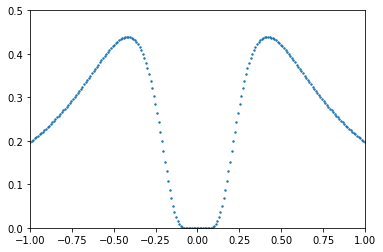

In [15]:
# plt imported in a previous cell.
import numpy as np
n = 212 # Even, so we don't include zero
xi = np.linspace(-1, 1, n)
yi = np.zeros(n)
dx = 2/n
area = 0
for i in range(n):
    yi[i] = np.exp(-1.0/xi[i])/(xi[i]**2*(1+np.exp(-1/xi[i]))**2)
    area += yi[i]*dx

print( 'Using a Riemann sum, the area under the curve from -1 to 1 is approximately ', area )
plt.scatter(xi,yi,s=2)
plt.axis([-1,1 , 0, 0.5])
plt.show()

In [21]:
f = exp(-1/x)/(x**2*(1+exp(-1/x))**2)
F = integrate(f, x )
print( 'The integral from SymPy is ', F )
FTOC = F.subs(x,1) - F.subs(x,-1)
print( 'The area under the curve from -1 to 1 is positive, not ', FTOC )
defint = integrate( f, (x,-1,1))
print( 'Using definite integration gets the same ', simplify(defint) )
E = np.exp(1.0)
answe = 1/(1+E) - 1/(1/E+1)
print( "That numerically evaluates to ", answe, "which is negative.  Oops.")

The integral from SymPy is  -1/(1 + exp(-1/x))
The area under the curve from -1 to 1 is positive, not  -1/(exp(-1) + 1) + 1/(1 + E)
Using definite integration gets the same  (1 - E)/(1 + E)
That numerically evaluates to  -0.4621171572600098 which is negative.  Oops.


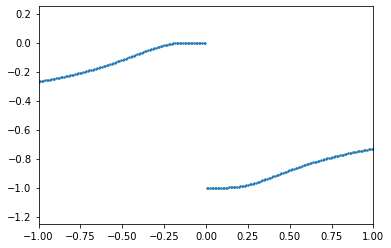

In [24]:
YI = np.zeros(n)
for i in range(n):
    YI[i] = -1/(1+np.exp(-1/xi[i]))
plt.scatter(xi,YI,s=2)
plt.axis([-1,1 , -1.25, 0.25])
plt.show()

Without calling "simplify," SymPy didn't recognize that `1/(1+E)-1/(exp(-1)+1) = (1-E)/(1+E)` (if by `E` Sympy means exp(1)).  But that's a smaller problem.  The computed answer has missed the discontinuity in the antiderivative at zero.

As of this writing, many computer algebra systems (not just SymPy) are broken by this example.  Maple's indefinite integral returns exactly the same wrong answer.  Matlab's Symbolic Toolbox gets it right!

There is something very important happening in that expression, though.  The computer algebra system has returned a <i>discontinuous</i> function as an antiderivative of a <i>continuous</i> function.

Anyone remember the tl;dr of the Fundamental Theorem of Calculus?  Likely not.  Even we have to look it up before we teach it, to be sure we have the fine details right.  The basic idea is, though, that integration <i>smooths</i> things out: integrate a continuous function, you get a <i>continuously differentiable</i> function, which is smoother.  Jump discontinuities spuriously introduced are <i>right out</i>.

So, what the computer algebra system is doing there <i>is not integration</i>.  Anyone get their knuckles rapped for not adding the "constant of integration" when you integrated on a test?  Lost a mark or two, maybe?

Turns out that's what's going on here.  By adding <i>different constants</i> in <i>different intervals</i> to this purported antiderivative, we can find a smooth antiderivative of $f(x)$.  The answer returned by SymPy (and Maple) is "correct" from the point of view of differential algebra, where constants are things that differentiate to zero and don't have "values" as such.

Many people who implement computer algebra systems (even some of our friends at Maple) argue that they are right and we are wrong, and don't see the point.  But they are wrong, and one day they'll get it.  Now, they do have a fix-up in their <i>definite</i> integration code: if you ask Maple int( f, x=-1..1) you will get the correct answer $\frac{2}{{\mathrm e}+1} \approx 0.53788\ldots$ after simplification.  But you have to ask Maple the right way, by using the syntax for definite integrals (as you see above, SymPy is different, and does not give the right answer that way). 

Matlab gets it.  Matlab's Symbolic Toolbox works quite hard to get continuous antiderivatives.  So we have confidence that Maple will one day get it. But Wolfram Alpha gets a discontinuous antiderivative, too, at this time of writing, so there's only a <i>little</i> pressure from the competition.

These facts have been known for quite a while now.  See [The Importance of Being Continuous](https://www.tandfonline.com/doi/abs/10.1080/0025570X.1994.11996235) by David Jeffrey, a paper that was written in 1994 (long predating Python or SymPy).  See also [Rectifying Transformations for Trigonometric Integrals](https://www.sciencedirect.com/science/article/pii/S0747717197901528) by the same author.

The disagreement amongst mathematicians&mdash;algebra versus analysis&mdash;has been going on for much longer, and goes at least back to Cauchy.  We are on Cauchy's side, here.  But there are lots of people who just want formulas, and don't care if they are discontinuous.

RMC retweeted something apropos the morning this paragraph was first written: Prof Michael Kinyon said "I used to think it was weird when people disagreed with me, but now I understand that some people just enjoy the feeling of being wrong."

